In [18]:
import cv2,os

data_path='true dataset 2\Vedic dataset'

In [19]:
categories=os.listdir(data_path)

In [20]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'diya': 0, 'kalash': 1, 'om': 2, 'sankh': 3, 'sriyantra': 4, 'swastika': 5}
['diya', 'kalash', 'om', 'sankh', 'sriyantra', 'swastika']
[0, 1, 2, 3, 4, 5]


In [21]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)


In [22]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [23]:
np.save('data',data)
np.save('target',new_target)

In [24]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [25]:
target.shape, data.shape  #category in target#

((3390, 6), (3390, 100, 100, 1))

In [26]:
target[1]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.6))

model.add(Dense(50,activation='relu'))

model.add(Dense(6,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [29]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)


Train on 2440 samples, validate on 611 samples
Epoch 1/12
2440/2440 [==============================] - 120s 49ms/step - loss: 1.5120 - accuracy: 0.3783 - val_loss: 1.4416 - val_accuracy: 0.4468
Epoch 2/12
2440/2440 [==============================] - 119s 49ms/step - loss: 1.2003 - accuracy: 0.5422 - val_loss: 1.0734 - val_accuracy: 0.6203
Epoch 3/12
2440/2440 [==============================] - 120s 49ms/step - loss: 0.8933 - accuracy: 0.6701 - val_loss: 0.9063 - val_accuracy: 0.6759
Epoch 4/12
2440/2440 [==============================] - 119s 49ms/step - loss: 0.6771 - accuracy: 0.7439 - val_loss: 0.8777 - val_accuracy: 0.6727
Epoch 5/12
2440/2440 [==============================] - 102s 42ms/step - loss: 0.5254 - accuracy: 0.8098 - val_loss: 0.8309 - val_accuracy: 0.6939
Epoch 6/12
2440/2440 [==============================] - 62s 25ms/step - loss: 0.4224 - accuracy: 0.8459 - val_loss: 0.7899 - val_accuracy: 0.7087
Epoch 7/12
2440/2440 [==============================] - 55s 23ms/step - 

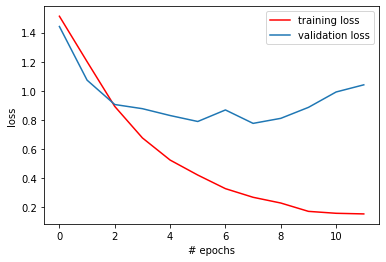

In [30]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [31]:
print(model.evaluate(test_data,test_target))

339/339 [==============================] - 2s 6ms/step
[0.8694679724783321, 0.764011800289154]


In [32]:
import pickle

In [33]:
with open('data_path_pickle.pkl', 'wb') as file:
    pickle.dump(data_path,file)

In [34]:
with open('data_path_pickle.pkl','rb') as f:
    jp = pickle.load(f)